<a href="https://colab.research.google.com/github/MikeF98/ERAU_CS540_Team4/blob/Lauren-Branch/RevisedLM_Anomaly_Isolation_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
flightdata = pd.read_csv(
    '/content/drive/MyDrive/MA 540 Data Mining/Revisedhistoric_data (1).csv',)

flightdata.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,time,iaco24,lat,long,velocity,heading,vertrate,callsign,onground,alert,spi,squawk,baroaltitude,geoaltitude,lastposupdate,lastcontact,serials
0,2021-12-11 21:06:48,a5d421,29.401136,-81.408961,56.919922,99.887989,-0.32512,ERU475,false,false,false,NULL,876.3000000000001,914.4000000000001,1.639257e+09,1.639257e+09,1639256400
1,2021-12-11 21:06:49,a5d421,29.401043,-81.408368,57.010516,100.397334,-0.32512,ERU475,false,false,false,NULL,876.3000000000001,914.4000000000001,1.639257e+09,1.639257e+09,1639256400
2,2021-12-11 21:06:50,a5d421,29.400970,-81.407846,57.010516,100.397334,-0.97536,ERU475,false,false,false,NULL,876.3000000000001,914.4000000000001,1.639257e+09,1.639257e+09,1639256400
3,2021-12-11 21:06:51,a5d421,29.400879,-81.407371,57.010516,100.397334,0.32512,ERU475,false,false,false,NULL,876.3000000000001,914.4000000000001,1.639257e+09,1.639257e+09,1639256400
4,2021-12-11 21:06:52,a5d421,29.400742,-81.406579,57.010516,100.397334,0.0,ERU475,false,false,false,NULL,876.3000000000001,914.4000000000001,1.639257e+09,1.639257e+09,1639256400


In [4]:
flightdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260992 entries, 0 to 2260991
Data columns (total 17 columns):
 #   Column         Dtype  
---  ------         -----  
 0   time           object 
 1   iaco24         object 
 2   lat            float64
 3   long           float64
 4   velocity       object 
 5   heading        object 
 6   vertrate       object 
 7   callsign       object 
 8   onground       object 
 9   alert          object 
 10  spi            object 
 11  squawk         object 
 12  baroaltitude   object 
 13  geoaltitude    object 
 14  lastposupdate  float64
 15  lastcontact    float64
 16  serials        int64  
dtypes: float64(4), int64(1), object(12)
memory usage: 293.3+ MB


Reorganizing Headers

In [13]:
df1 = flightdata[["time", "iaco24", "lat","long","velocity","vertrate", "baroaltitude", "heading", "callsign","onground","alert","spi","squawk","geoaltitude","lastposupdate","lastcontact","serials"]]
df1.head(2)

,time,iaco24,lat,long,velocity,vertrate,baroaltitude,heading,callsign,onground,alert,spi,squawk,geoaltitude,lastposupdate,lastcontact,serials
0,2021-12-11 21:06:48,a5d421,29.401136,-81.408961,56.919922,-0.32512,876.3000000000001,99.887989,ERU475,false,false,false,NULL,914.4000000000001,1.639257e+09,1.639257e+09,1639256400
1,2021-12-11 21:06:49,a5d421,29.401043,-81.408368,57.010516,-0.32512,876.3000000000001,100.397334,ERU475,false,false,false,NULL,914.4000000000001,1.639257e+09,1.639257e+09,1639256400


Converting time to datetime

In [14]:
df1.time=pd.to_datetime(df1['time'])
#converted_df = pd.to_datetime(flightdata['time'], unit='s')

In [15]:
df1.head(5)

,time,iaco24,lat,long,velocity,vertrate,baroaltitude,heading,callsign,onground,alert,spi,squawk,geoaltitude,lastposupdate,lastcontact,serials
0,2021-12-11 21:06:48,a5d421,29.401136,-81.408961,56.919922,-0.32512,876.3000000000001,99.887989,ERU475,false,false,false,NULL,914.4000000000001,1.639257e+09,1.639257e+09,1639256400
1,2021-12-11 21:06:49,a5d421,29.401043,-81.408368,57.010516,-0.32512,876.3000000000001,100.397334,ERU475,false,false,false,NULL,914.4000000000001,1.639257e+09,1.639257e+09,1639256400
2,2021-12-11 21:06:50,a5d421,29.400970,-81.407846,57.010516,-0.97536,876.3000000000001,100.397334,ERU475,false,false,false,NULL,914.4000000000001,1.639257e+09,1.639257e+09,1639256400
3,2021-12-11 21:06:51,a5d421,29.400879,-81.407371,57.010516,0.32512,876.3000000000001,100.397334,ERU475,false,false,false,NULL,914.4000000000001,1.639257e+09,1.639257e+09,1639256400
4,2021-12-11 21:06:52,a5d421,29.400742,-81.406579,57.010516,0.0,876.3000000000001,100.397334,ERU475,false,false,false,NULL,914.4000000000001,1.639257e+09,1.639257e+09,1639256400


In [16]:
df1.dtypes

time             datetime64[ns]
iaco24                   object
lat                     float64
long                    float64
velocity                 object
vertrate                 object
baroaltitude             object
heading                  object
callsign                 object
onground                 object
alert                    object
spi                      object
squawk                   object
geoaltitude              object
lastposupdate           float64
lastcontact             float64
serials                   int64
dtype: object

In [17]:
df=df1

Making attributes int64

In [18]:
df['velocity'] = pd.to_numeric(df['velocity'],errors='coerce')
df['baroaltitude'] = pd.to_numeric(df['baroaltitude'],errors = 'coerce')
df['vertrate'] = pd.to_numeric(df['vertrate'],errors = 'coerce')
df['lat'] = pd.to_numeric(df['lat'],errors = 'coerce')
df['long'] = pd.to_numeric(df['long'],errors = 'coerce')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260992 entries, 0 to 2260991
Data columns (total 17 columns):
 #   Column         Dtype         
---  ------         -----         
 0   time           datetime64[ns]
 1   iaco24         object        
 2   lat            float64       
 3   long           float64       
 4   velocity       float64       
 5   vertrate       float64       
 6   baroaltitude   float64       
 7   heading        object        
 8   callsign       object        
 9   onground       object        
 10  alert          object        
 11  spi            object        
 12  squawk         object        
 13  geoaltitude    object        
 14  lastposupdate  float64       
 15  lastcontact    float64       
 16  serials        int64         
dtypes: datetime64[ns](1), float64(7), int64(1), object(8)
memory usage: 293.3+ MB
None


THE MODEL and checking for nulls

In [19]:
random_state = np.random.RandomState(42)

In [20]:
df.isnull().any().any() 

True

In [21]:
df.isnull().any()

time             False
iaco24           False
lat              False
long             False
velocity          True
vertrate          True
baroaltitude      True
heading          False
callsign         False
onground         False
alert            False
spi              False
squawk           False
geoaltitude      False
lastposupdate    False
lastcontact      False
serials          False
dtype: bool

In [22]:
df2 = df.dropna()

MAIN Dataframe is now df2!

In [23]:
df2.isna().value_counts()

time   iaco24  lat    long   velocity  vertrate  baroaltitude  heading  callsign  onground  alert  spi    squawk  geoaltitude  lastposupdate  lastcontact  serials
False  False   False  False  False     False     False         False    False     False     False  False  False   False        False          False        False      2256259
dtype: int64

None


In [24]:
df['velocity'].isna().value_counts()

False    2260462
True         530
Name: velocity, dtype: int64

Checking for outliers with a boxplot

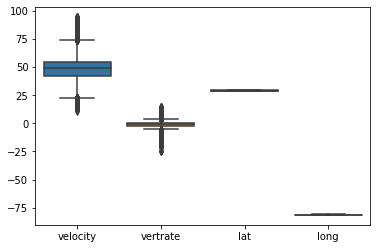

In [26]:
sns.boxplot(data=df2[['velocity','vertrate','lat','long']])

ISOLATION FOREST MODEL

In [27]:
model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.003),random_state=random_state)

#model.fit(df2[['velocity','vertrate','baroaltitude']])
model.fit(df2[['velocity','vertrate','lat','long']])

print(model.get_params())

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


{'bootstrap': False, 'contamination': 0.003, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x7FF33DDAE050, 'verbose': 0, 'warm_start': False}


In [28]:
df2['scores'] = model.decision_function(df2[['velocity','vertrate','lat','long']])

df2['anomaly_score'] = model.predict(df2[['velocity','vertrate','lat','long']])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
df2[df2['anomaly_score']==-1].count()/len(df2)

time             0.002942
iaco24           0.002942
lat              0.002942
long             0.002942
velocity         0.002942
vertrate         0.002942
baroaltitude     0.002942
heading          0.002942
callsign         0.002942
onground         0.002942
alert            0.002942
spi              0.002942
squawk           0.002942
geoaltitude      0.002942
lastposupdate    0.002942
lastcontact      0.002942
serials          0.002942
scores           0.002942
anomaly_score    0.002942
dtype: float64

## Second Isolation Forest Model and Visualization

In [30]:
df2.columns
#specify the 12 metrics column names to be modelled
to_model_columns=df2.columns[3:6]
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.003), \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(df2[to_model_columns])
pred = clf.predict(df2[to_model_columns])
df2['anomaly']=pred
outliers=df2.loc[df2['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(df2['anomaly'].value_counts())

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


 1    2249491
-1       6768
Name: anomaly, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
import matplotlib.pyplot as plt

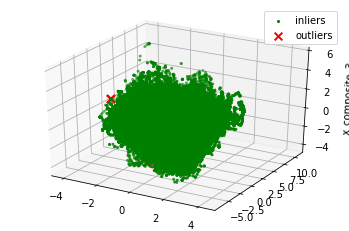

In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(df2[to_model_columns])
X_reduce = pca.fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

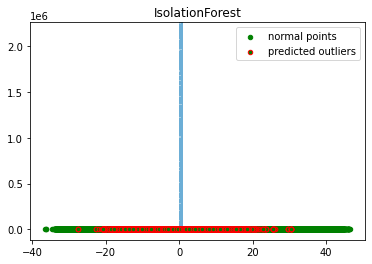

In [33]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(df2[to_model_columns])
res=pd.DataFrame(pca.transform(df2[to_model_columns]))
Z = np.array(res)
plt.title("IsolationForest")
plt.contourf( Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()